# Results of different #agent values

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','num_agents'], as_index=False).mean()
results.head()

,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
0,StochasticStaticLackPlanner,100,5.0,2.0,2.0,46.333333,22.833821,2746.054823,39.080769
1,StochasticStaticLackPlanner,200,5.0,2.0,2.0,45.000000,22.823530,5776.972394,54.472320
2,StochasticStaticLackPlanner,300,5.0,2.0,2.0,45.000000,32.262574,8997.829015,83.550423


In [7]:
planners_names = ['StochasticStaticLackPlanner']

colors = ['tab:red','tab:brown','tab:blue','tab:green','navajowhite','burlywood','tab:orange']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Settings

* ...

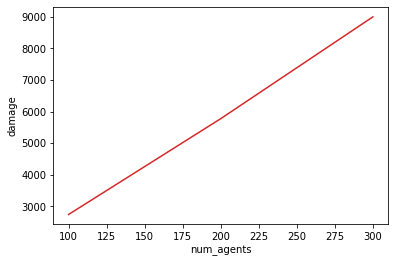

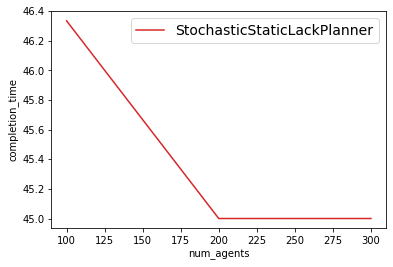

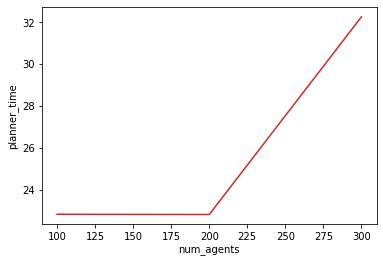

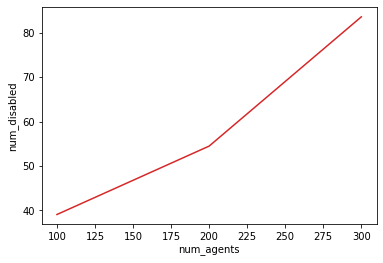

In [8]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]),list(r[y]), c=colors[j])

    if i == 1:
        plt.legend(planners_names, fontsize='14')

    plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()